In [1]:
#importing liabraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns #for clean data visuals
from sklearn.model_selection import train_test_split #to split data into train and test
from sklearn.linear_model import LinearRegression #baseline linear regression model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #regresison metrics
from sklearn.tree import DecisionTreeRegressor # Decision tree algorithms
from sklearn.ensemble import RandomForestRegressor # Random Tree regressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bikedata/Bikedata.csv


In [2]:
# reading file in pandas dataframe

df = pd.read_csv("/kaggle/input/bikedata/Bikedata.csv", encoding="latin1")
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Descriptive data analysis

In [3]:
print("shape pf dataset: ", df.shape)
print("--------------------------------------------------------")
print("information about dataset: ", df.info())
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print(" Is there any null values in data: ", df.isnull().sum())

shape pf dataset:  (8760, 14)
--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday          

In [4]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


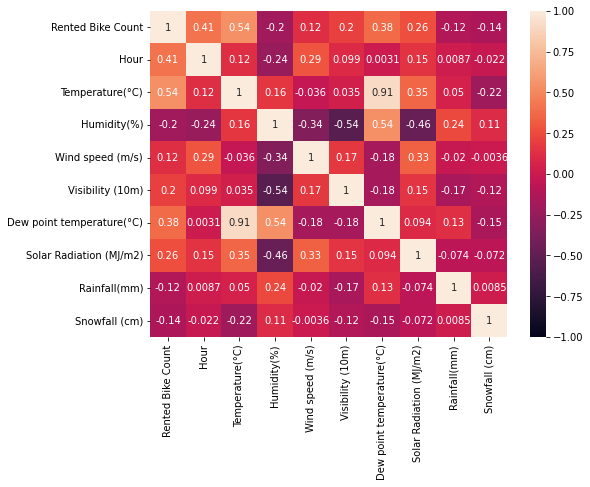

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

> there is a high correlation between temp and dew point temp

> we will remove Dew point temp

> Wind speed columns do not effect bike ride,  we should remove it

> we can even remove solar rediation as well as it correlates with temp


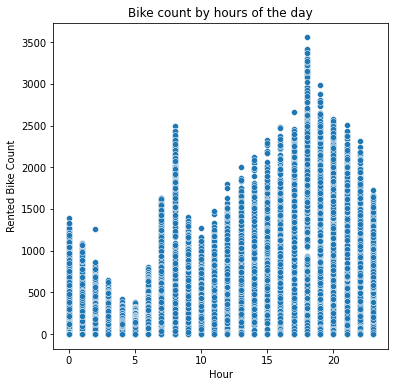

In [6]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Hour', y='Rented Bike Count', data=df)
plt.title("Bike count by hours of the day")
plt.show()

> During evening and night hours bikes rides are more compared to day and noon

> we can keep this column as of now

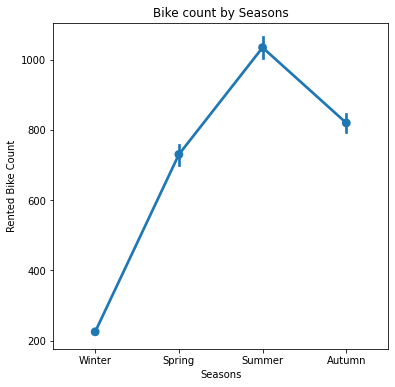

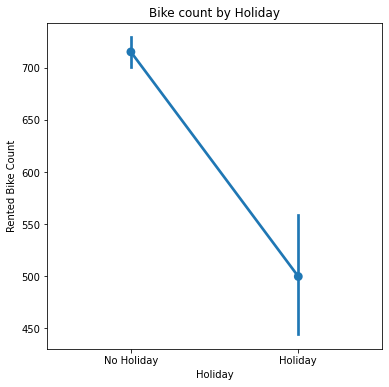

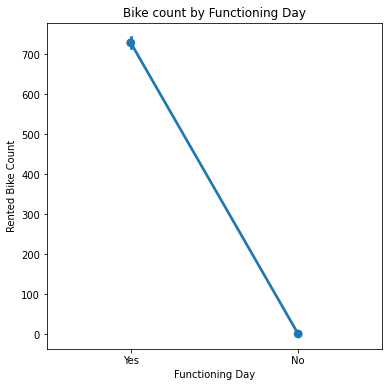

In [7]:
cat_col = ['Seasons', 'Holiday', 'Functioning Day']

# plot target vs categorical columns:
for i, col in enumerate(cat_col):
    plt.figure(i, figsize=(6,6))
    sns.pointplot(x=col, y='Rented Bike Count', data=df)
    plt.title("Bike count by {}".format(col))
    plt.show()    

> we should keep all the categorical columms in given dataset, all affects bike count in a big way

> we will also drop date and time column as over target in not depend on dates

# Feature extraction and selection

In [8]:
remove_col = ['Date','Dew point temperature(°C)','Wind speed (m/s)','Solar Radiation (MJ/m2)']
cat_col = ['Seasons', 'Holiday','Functioning Day']

# we will take sqrt of target column to build a model

n_df = df.drop(remove_col, axis=1)

# get dummies for categorical variables

n_df = pd.get_dummies(n_df, columns=cat_col, drop_first=True)

# standardize Visibility colum

n_df['Visibility (10m)'] = n_df['Visibility (10m)'].map(lambda x: round((x-n_df['Visibility (10m)'].mean(axis=0))/
                                                        n_df['Visibility (10m)'].std(axis=0),2))

n_df.shape

(8760, 12)

> Let's build model using above data

# Model traning and testing

In [9]:
# create input features and output feature
X = n_df.drop('Rented Bike Count', axis=1)
y = n_df['Rented Bike Count']


# train and test split the data
X_trn ,X_tst, y_trn, y_tst = train_test_split(X, y, 
                                              train_size=0.70, 
                                              random_state=42)

# build baseline model using linear regression method of scikit learn
bl_model = LinearRegression().fit(X_trn,y_trn)

# predict on test data
y_pred = bl_model.predict(X_tst)

# score the model using MSE and r2 metrics
MSE = mean_squared_error(y_pred,y_tst)
R2 = r2_score(y_pred,y_tst)
MAE = mean_absolute_error(y_pred, y_tst)
print("Mean squared error: ", MSE)
print("R2 of model:", R2)
print("Mean absolute error: ", MAE)

Mean squared error:  193507.41179246185
R2 of model: 0.17830431113568512
Mean absolute error:  329.3692014592047


> we do not have any highly correlated columns so predictability of target is very low using linear model

In [10]:
# Using tree based models

models = {'DT': DecisionTreeRegressor(max_depth=10, 
                                      max_features='auto'),
          'RF': RandomForestRegressor(n_estimators=700, 
                                      max_leaf_nodes=1000, 
                                      max_depth=10)
         }

for k, val in models.items():
    val.fit(X_trn,y_trn)
    scorer = val.score(X_tst,y_tst)
    print("R2 of the model {} is {}".format(k,round(scorer,2)))

R2 of the model DT is 0.81
R2 of the model RF is 0.85


> As we can learn the difference that tree based model works best as target variable is not linearly predicatable.

> Random forest model model is best fit here with 700 estimators and with 1000 max_leaf_nodes

> IN conclusion, we can understand that, when features are not much collinear with target varible and differentiable with categorical variable,Tree based models win the game!

# Thank you!